# Interpretable Machine Learning
### Linear Regression, Logistic Regression, and Generalized Additive Model
**Data:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
<br>
**License:** Data files © Original Authors
<br>
**Owner:** BlastChar
<br>
**Work:** Lennox Anderson
***

# Dependencies

In [3]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import (mean_squared_error, mean_squared_error, r2_score, accuracy_score, 
    confusion_matrix, accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pygam import LogisticGAM, s, f
from functools import reduce
from operator import add

***

# EDA

***

In [8]:
df = pd.read_csv('/Users/lennox/Documents/machineLearning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


### Column Descriptions

- **customerID**: A unique identifier assigned to each customer.
  
- **gender**: The gender of the customer in this case Male or Female.
  
- **SeniorCitizen**: Indicates whether the customer is a senior citizen.
  
- **Partner**: Indicates if the customer has a partner.
  
- **Dependents**: Indicates if the customer has dependents.
  
- **tenure**: The number of months the customer has been with the company.
  
- **PhoneService**: Indicates if the customer has a phone service.
  
- **MultipleLines**: Indicates if the customer has multiple phone lines (Yes/No/No phone service).
  
- **InternetService**: The type of internet service the customer has (DSL, Fiber optic, No internet service).
  
- **OnlineSecurity**: Indicates if the customer has online security services (Yes/No/No internet service).
  
- **OnlineBackup**: Indicates if the customer has online backup services (Yes/No/No internet service).
  
- **DeviceProtection**: Indicates if the customer has device protection services (Yes/No/No internet service).
  
- **TechSupport**: Indicates if the customer has technical support services (Yes/No/No internet service).
  
- **StreamingTV**: Indicates if the customer has streaming TV services (Yes/No/No internet service).
  
- **StreamingMovies**: Indicates if the customer has streaming movie services (Yes/No/No internet service).
  
- **Contract**: The type of contract the customer has (Month-to-month, One year, Two year).
  
- **PaperlessBilling**: Indicates if the customer has opted for paperless billing.
  
- **PaymentMethod**: The payment method used by the customer.
  
- **MonthlyCharges**: The amount charged to the customer each month.
  
- **TotalCharges**: The total amount charged to the customer over their tenure.
  
- **Churn**: Indicates if the customer has churned.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
duplicate_rows = df.duplicated()
df[duplicate_rows]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
unique_genders = df['gender'].unique()
unique_genders

array(['Female', 'Male'], dtype=object)

In [14]:
unique_genders = df['SeniorCitizen'].unique()
unique_genders

array([0, 1])

In [15]:
unique_genders = df['Partner'].unique()
unique_genders

array(['Yes', 'No'], dtype=object)

In [16]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Partner'].head()

0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: int64

In [17]:
unique_genders = df['Dependents'].unique()
unique_genders

array(['No', 'Yes'], dtype=object)

In [18]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['Dependents'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int64

In [19]:
unique_genders = df['PhoneService'].unique()
unique_genders

array(['No', 'Yes'], dtype=object)

In [20]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No':0})
df['PhoneService'].head()

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64

In [21]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [22]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [23]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling']

0       1
1       0
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling, Length: 7043, dtype: int64

In [30]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [32]:
non_numeric_values = df[~pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()]

non_numeric_values[['customerID', 'TotalCharges']]

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [33]:
print(df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0                0  No phone service             DSL       

### Assumptions
- **Linearity**
- **Independence**
- **Homoscedasticity**
- **Normality**
- **No multicollinearity**
- **No autocorrelation**
- **No endogeneity**
- **Correct specification** 

#

### Linearity

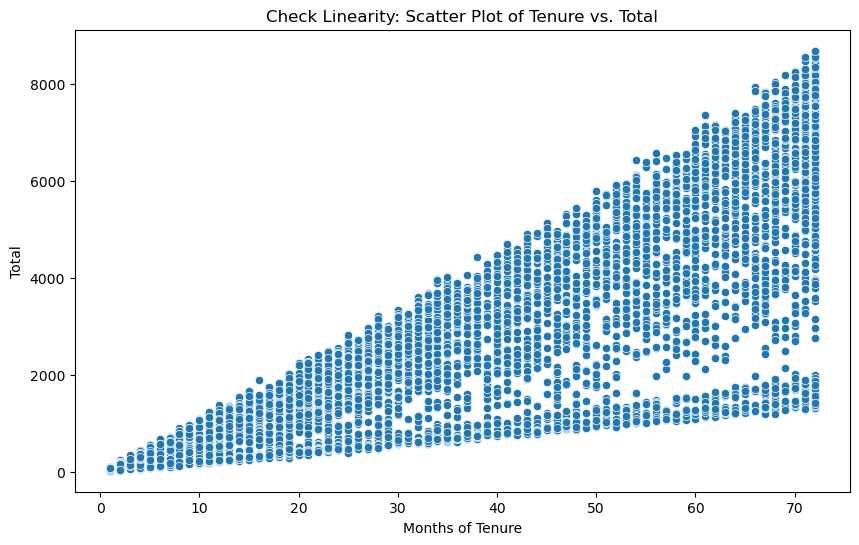

In [37]:
df_cleaned = df.dropna(subset=['tenure', 'TotalCharges'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df_cleaned)
plt.title('Check Linearity: Scatter Plot of Tenure vs. Total')
plt.xlabel('Months of Tenure')
plt.ylabel('Total')
plt.show()

Linearity should be present before performing linear regression because the model assumes a linear relationship between the independent and dependent variables. A linear model may be appropriate in this case to describe the relationship between these two variables

#

### Independence

In [41]:
if len(df['customerID']) == len(df['customerID'].unique()):
    print("All customer IDs are unique. No duplicates found.")
else:
    print("There are duplicate customers")

All customer IDs are unique. No duplicates found.


While uniqueness is a good proxy for independence, it doesn’t account for potential underlying dependencies between data points, such as time-based trends or relationships between features.

#

### Homoscedasticity

In [45]:
df['Log_Total'] = np.log(df['TotalCharges'] + 1)
df['Log_Total']

0       3.429137
1       7.544597
2       4.692723
3       7.518471
4       5.028148
          ...   
7038    7.596643
7039    8.904345
7040    5.850621
7041    5.728800
7042    8.831347
Name: Log_Total, Length: 7043, dtype: float64

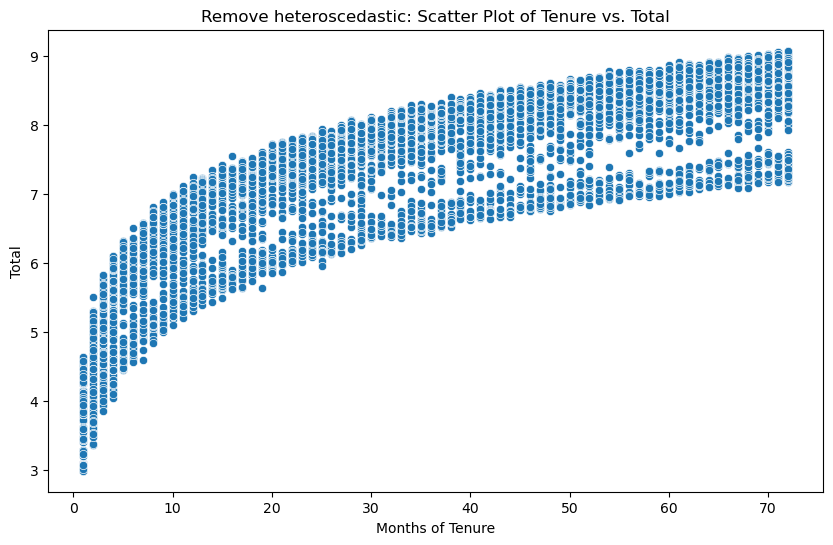

In [46]:
df_cleaned = df.dropna(subset=['tenure', 'Log_Total'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='Log_Total', data=df_cleaned)
plt.title('Remove heteroscedastic: Scatter Plot of Tenure vs. Total')
plt.xlabel('Months of Tenure')
plt.ylabel('Total')
plt.show()

Homoscedasticity is having a nice even scatter of points around a line while heteroscedasticity is when those points start to spread out more on one side than the other. In this case, we apply log transformation to stabilize the variance of the data and reduce heteroscedasticity.

# 

### Normality

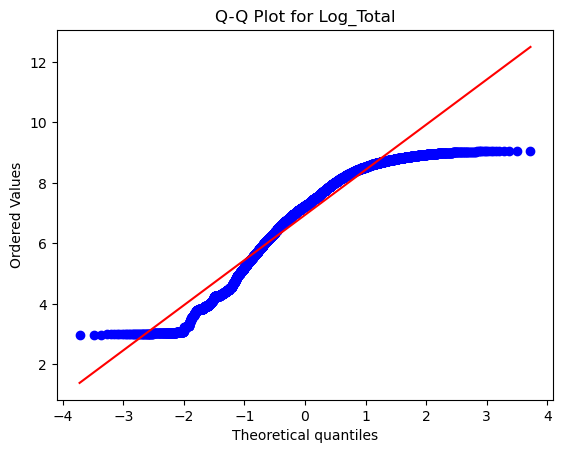

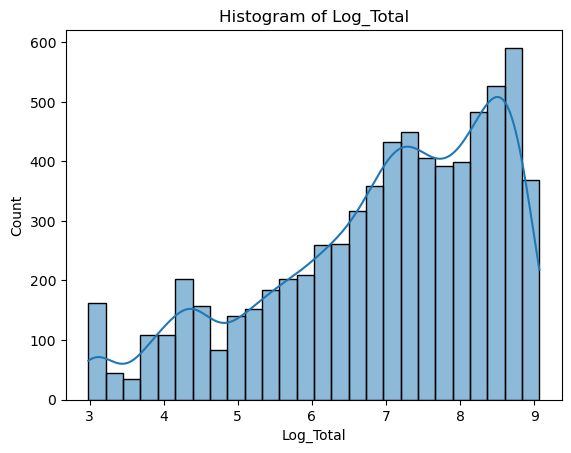

In [50]:
stats.probplot(df_cleaned['Log_Total'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Log_Total')
plt.show()

sns.histplot(df_cleaned['Log_Total'], kde=True)
plt.title('Histogram of Log_Total')
plt.show()

The data shows non-normality, with skewness on both tails, its especially evident from the QQ plot. This may impact model assumptions that rely on normally distributed residuals such as linear regression.

#

### No multicollinearity

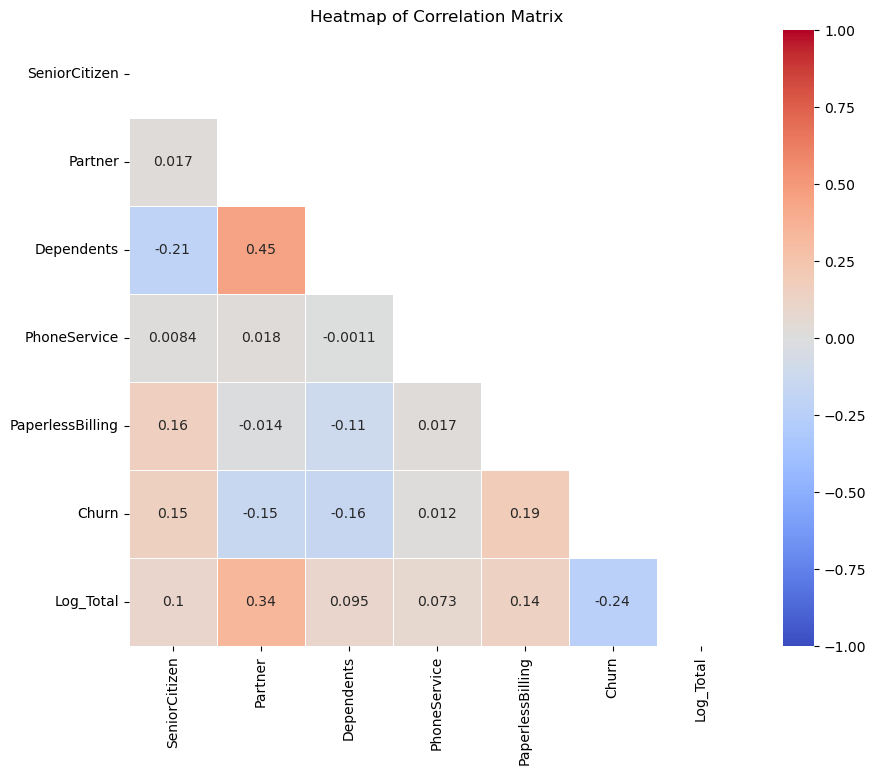

In [54]:
# drop the features that are expected to have high correlation due to our eda
df_cleaned_reduced = df_cleaned.drop(['MonthlyCharges', 'TotalCharges', 'customerID', 'tenure'], axis=1)
df_cleaned_reduced = df_cleaned_reduced.select_dtypes(include=[np.number])

# calculate correlation 
corr_matrix_reduced = df_cleaned_reduced.corr()

# create the half matric map using mask
mask = np.triu(np.ones_like(corr_matrix_reduced, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


There is little multicollinearity in this heatmap because the correlation values between the independent variables are generally low, with none of the pairwise correlations approaching 1 or -1, indicating that the features are not strongly linearly related to each other.

#

### Autocorrelation

In [58]:
# our independent variables
X = df_cleaned[['tenure', 'MonthlyCharges']] 
# our dependent variable
y = df_cleaned['Log_Total']
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# test set prediction
y_pred = model.predict(X_test)
# get more diagnostic stats
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Total   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:04:44   Log-Likelihood:                -5241.4
No. Observations:                5625   AIC:                         1.049e+04
Df Residuals:                    5622   BIC:                         1.051e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1301      0.021    201.

Durbin-Watson (1.983): This statistic tests for autocorrelation in the residuals (i.e., whether the residuals are independent of each other). A value close to 2 (as in your case) suggests no autocorrelation, which is good.

# Linear Regression 

### When to Use Linear Regression:
- **Relationship is Linear**: When the relationship between the independent variables and the dependent variable is approximately linear.
- **Continuous Dependent Variable**: When the dependent variable is continuous and numeric.
- **Predicting a Single Outcome**: When predicting one outcome rather than multiple categories or labels.
- **Simple and Interpretable Model**: When you need a simple, interpretable model for small datasets or quick insights.
- **No or Little Multicollinearity**: When independent variables are not highly correlated with each other.

### When Not to Use Linear Regression:
- **Non-Linear Relationship**: When the relationship between the independent and dependent variables is not linear.
- **Categorical Dependent Variable**: When the dependent variable is categorical (use classification models instead).
- **Significant Outliers**: When there are many outliers in the dataset, as they can heavily influence the model.
- **High Multicollinearity**: When independent variables are highly correlated, which can distort results.
- **Complex Relationships**: When the relationships are too complex for a linear model (consider non-linear models like decision trees or neural networks).


In [62]:
# one hot encoding 
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
# separate the target we want to predict from the other features
X = df_cleaned.drop('Churn', axis=1) 
y = df_cleaned['Churn']  
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
# scale all values by std
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate r squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# turning predictions into either yes or no based on being above or below .5
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

# get mse
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

R-squared: 0.2558381144285461

Confusion Matrix:
[[996  50]
 [254 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1046
           1       0.68      0.30      0.41       361

    accuracy                           0.78      1407
   macro avg       0.74      0.62      0.64      1407
weighted avg       0.77      0.78      0.75      1407


Mean Squared Error: 0.14194435122746227


# Logistic Regression

## When to Use Logistic Regression:
- **Binary Dependent Variable:** When the dependent variable is categorical and binary.
- **Multinomial or Ordinal Outcomes:** Logistic regression can be extended to handle multinomial or ordinal dependent variables.
- **Predicting Probabilities:** When you need to estimate the probability of an event occurring based on input variables.
- **Linearity in the Log-Odds:** When there is a linear relationship between the independent variables and the log-odds of the dependent variable.
- **Independent Observations:** When observations are independent of each other.
- **No or Little Multicollinearity:** When independent variables are not highly correlated with one another.
    Large Sample Size: Logistic regression performs well with large datasets where the number of events is sufficient for reliable estimates.

## When Not to Use Logistic Regression:
- **Continuous Dependent Variable:** When the dependent variable is continuous.
- **Non-Linear Relationships in Log-Odds:** When the relationship between the independent variables and the log-odds of the outcome is non-linear, and this cannot be addressed by transforming variables or adding interaction terms.
- **Significant Outliers or High Leverage Points:** When outliers or influential data points unduly affect the model's estimates.
- **Small Sample Size:** When the dataset is too small, especially with few occurrences of the event of interest, which can lead to unreliable estimates.
- **High Multicollinearity:** When independent variables are highly correlated, causing instability in coefficient estimates.
- **Complex Relationships:** When the relationships between variables are too complex for logistic regression to capture effectively.
- **Non-Independent Observations:** When the observations are not independent, violating a key assumption of logistic regression.
- **Imbalanced Classes:** When the classes are highly imbalanced, logistic regression may perform poorly without techniques to address the imbalance.

In [65]:
# convert totalcharves' to numeric and fill nans with 0, and compute logTotal using np.log1p to handle zeros
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  
df['TotalCharges'].fillna(0, inplace=True)  
df['Log_Total'] = np.log1p(df['TotalCharges'])  
# apply the natural log to 'MonthlyCharges' to handle zeroes in this case we are re-calculating it
df['Log_MonthlyCharges'] = np.log1p(df['MonthlyCharges'])  
# turn churn into int
df['Churn'] = df['Churn'].astype(int)  
# bool ti int
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()  
# get all boolean classes and turn into int
df[bool_cols] = df[bool_cols].astype(int)  
# selected classes for model
features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService','PaperlessBilling', 'Log_MonthlyCharges', 'Log_Total']  
# get categorical classes
categorical_cols = df.select_dtypes(include=['object']).columns.tolist() 

# one hot coding, will help performance in future gam additive
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  

/var/folders/n_/vx3kcgzj67q_z0t840cm_5ym0000gn/T/ipykernel_92785/2509729014.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


Accuracy of model: 0.80
Confusion Matrix
[[947  89]
 [188 185]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.68      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


ROC AUC Score: 0.85


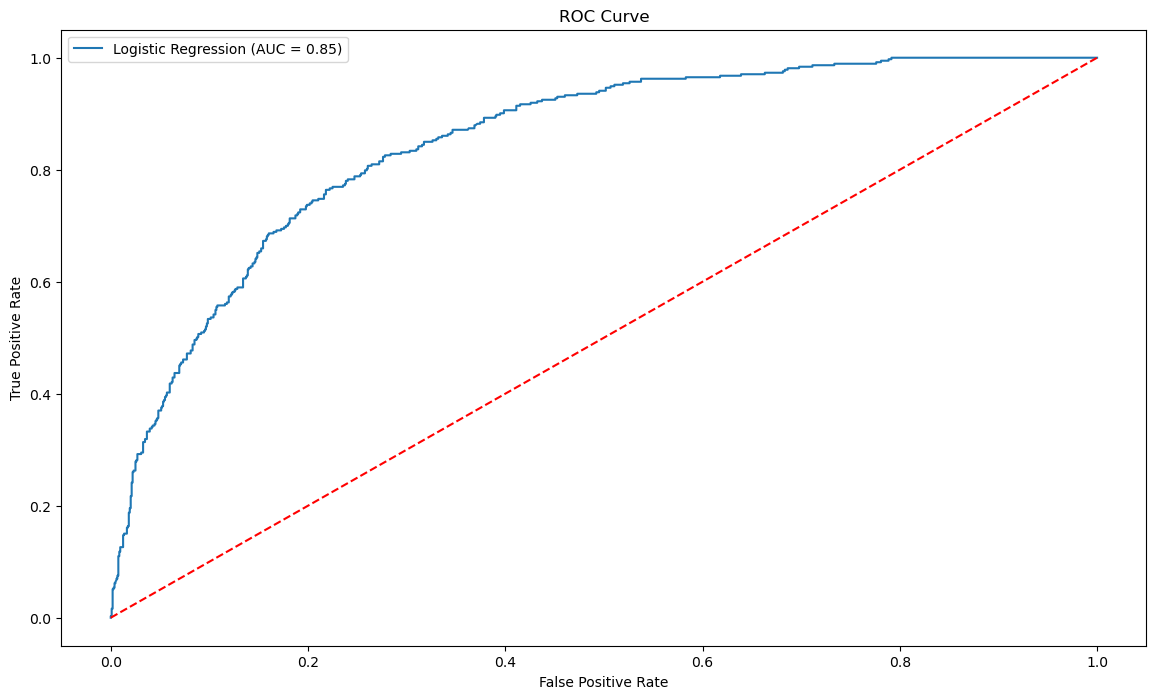

In [66]:
X = df[features]  
y = df['Churn']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  

# scaling classes for normalization
numerical_cols = ['tenure', 'Log_MonthlyCharges', 'Log_Total']  
scaler = StandardScaler()  
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])  
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  

# train the logistic regression model
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)  

y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]  

# predict class labels setting a bar
y_pred_log = (y_pred_proba_log >= 0.5).astype(int)  

accuracy_log = accuracy_score(y_test, y_pred_log)  
print(f"Accuracy of model: {accuracy_log:.2f}")  
conf_matrix_log = confusion_matrix(y_test, y_pred_log)  
print("Confusion Matrix")
print(conf_matrix_log)  
print("Classification Report")
class_report_log = classification_report(y_test, y_pred_log)  
print(class_report_log)

# get roc auc score
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)  
# calculate how well the model separates classes
print(f"\nROC AUC Score: {roc_auc_log:.2f}")  
# get false and true positive
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)  
plt.figure(figsize=(14, 8))  
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')  
plt.legend()  
plt.show()  


# Generalized Additive Model

Use the original features because GAMs can capture non-linear relationships without the need for transformation.

In [69]:
# handle missing values and conversion of turn and bools
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.loc[:, 'TotalCharges'] = df['TotalCharges'].fillna(0)
df['Churn'] = df['Churn'].astype(int)
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

# find and encode categorical classes
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Churn']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes


/var/folders/n_/vx3kcgzj67q_z0t840cm_5ym0000gn/T/ipykernel_92785/2234394386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = X[numerical_cols].astype(float)


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     41.8334
Link Function:                        LogitLink Log Likelihood:                                 -2375.1273
Number of Samples:                         5634 AIC:                                             4833.9214
                                                AICc:                                            4834.5931
                                                UBRE:                                               2.8639
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2732
Feature Function                  Lam

/var/folders/n_/vx3kcgzj67q_z0t840cm_5ym0000gn/T/ipykernel_92785/2234394386.py:32: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_model.summary()


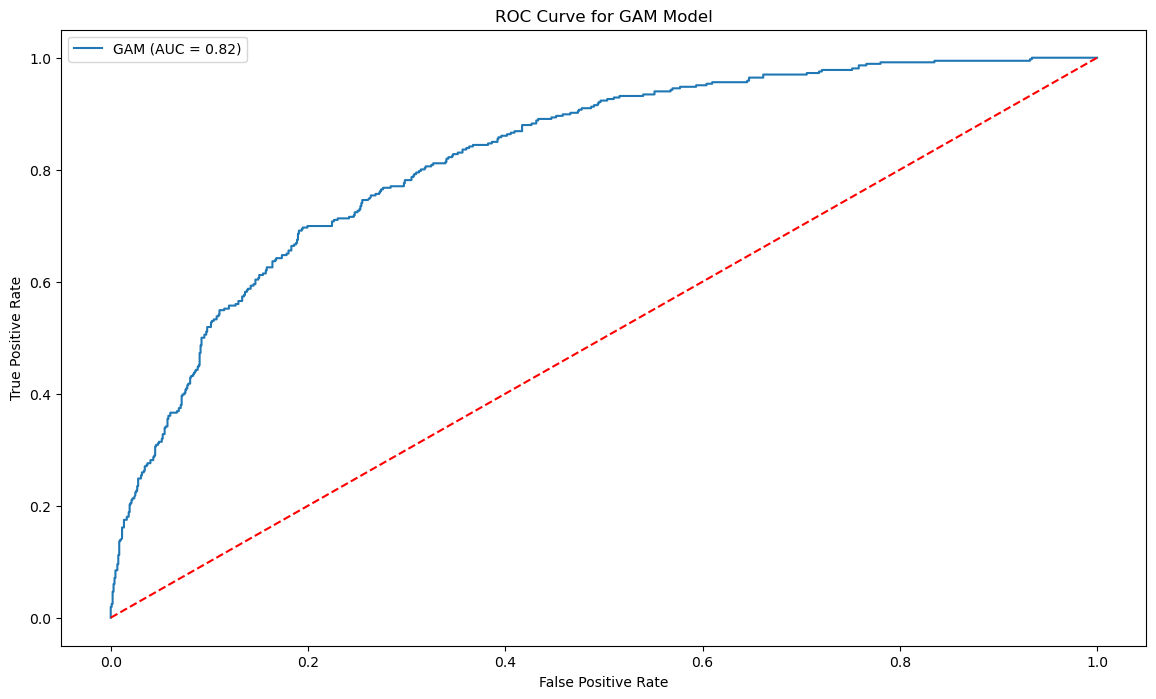

In [70]:
# selected classes
features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
features.extend(categorical_cols)
X = df[features]
y = df['Churn']

# ensure the classes are float values
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = X[numerical_cols].astype(float)

# scale for normalization
scaler = StandardScaler()
X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

# creates terms_list by applying s func to numerical columns and f func to other columns, using their positions on x
terms_list_gam = []
for feature in numerical_cols:
    idx_gam = X.columns.get_loc(feature)
    terms_list_gam.append(s(idx_gam))

for feature in X.columns:
    if feature not in numerical_cols:
        idx_gam = X.columns.get_loc(feature)
        terms_list_gam.append(f(idx_gam))
terms_gam = reduce(add, terms_list_gam)

# init the gam model
gam_model = LogisticGAM(terms_gam).fit(X_train.values, y_train.values)

gam_model.summary()
y_pred_proba_gam = gam_model.predict_proba(X_test.values)
y_pred_gam = gam_model.predict(X_test.values)

accuracy_gam = accuracy_score(y_test, y_pred_gam)
print(f"Accuracy: {accuracy_gam:.2f}")
conf_matrix_gam = confusion_matrix(y_test, y_pred_gam)
print("Confusion Matrix (GAM)")
print(conf_matrix_gam)
print("Classification Report (GAM):")
class_report_gam = classification_report(y_test, y_pred_gam)
print(class_report_gam)

roc_auc_gam = roc_auc_score(y_test, y_pred_proba_gam)
print(f"\nROC AUC Score (GAM): {roc_auc_gam:.2f}")

# get false and true positive rates for GAM
fpr_gam, tpr_gam, thresholds_gam = roc_curve(y_test, y_pred_proba_gam)

plt.figure(figsize=(14, 8))
plt.plot(fpr_gam, tpr_gam, label=f'GAM (AUC = {roc_auc_gam:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GAM Model')
plt.legend()
plt.show()

# Model Analysis for Predicting Churn

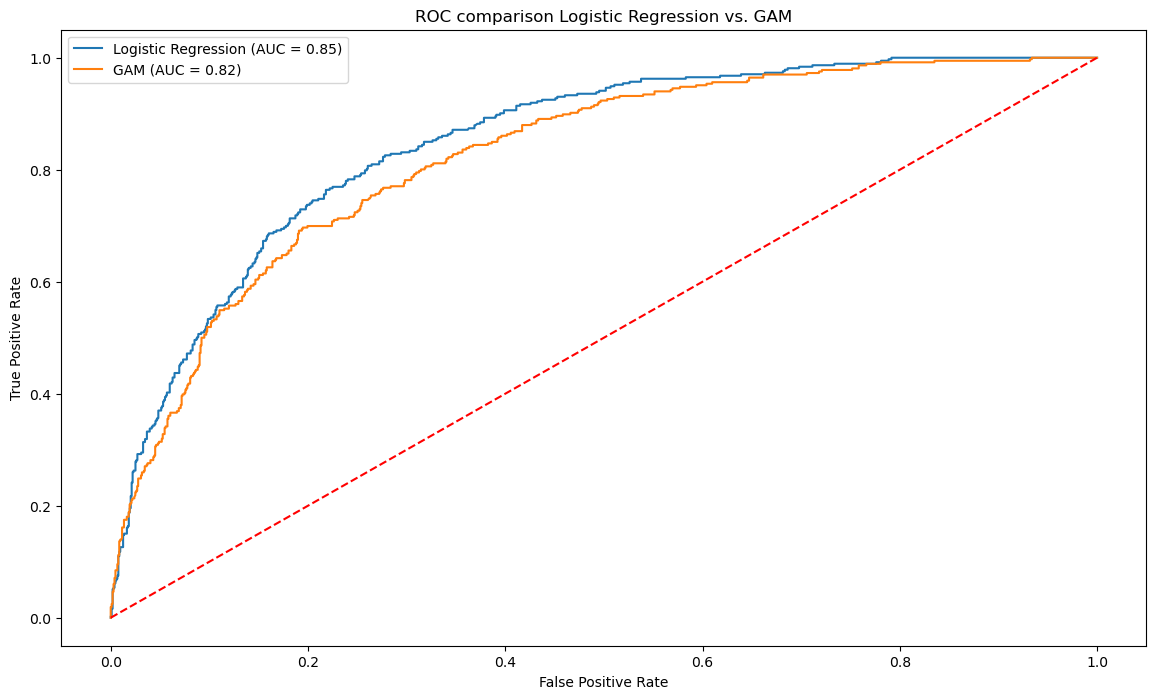

In [72]:
plt.figure(figsize=(14, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_gam, tpr_gam, label=f'GAM (AUC = {roc_auc_gam:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC comparison Logistic Regression vs. GAM')
plt.legend()
plt.show()

Linear regression is not the model of choice for this data because it assumes a continuous outcome, whereas this problem involves predicting a binary outcome, which is better suited for classification models like logistic regression or GAM. With than being said we will move to the camparison between both of those below.

- **Better at telling them apart**: Logistic Regression had a higher ROC AUC score (0.85 vs. 0.82), so it's slightly better at separating churners from non-churners.
  
- **More accurate at predicting churn**: It had higher precision of 68% for predicting who would churn, meaning it was better at reducing false positives.

- **Slightly better at balancing errors**: Logistic Regression had a better f1-score of 57% for churners and balanced true positives and false positives better.

- **Works well overall**: Both models had the same accuracy (80%), but Logistic Regression's small wins in precision and AUC make it the stronger choice.

- **It’s simpler**: Logistic Regression is easier to explain and use compared to the more complex GAM model, especially when their performance is close.
